In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import and view data
data = pd.read_csv('pi-data.csv')
data.head()

,Date & Time,BGSC85050.CIN,BGSO85050.CIN,FT85050.MEAS,ORF_FT85050.RO01,ORF_FT85050.RO02,PT85050.MEAS,PT85051.MEAS,TT85051.MEAS,TZT85012B.MEAS,TT85011B.MEAS,PDT85041A.MEAS,PDT85041B.MEAS,TT85044A.MEAS,TT85044B.MEAS,TZT85044B.MEAS,TT85020.MEAS,TT2211.MEAS
0,01/01/2019 00:00,TRUE,FALSE,344.6121521,10734.33789,No Data,28.06739807,4.500781536,59.87100983,No Data,No Data,0.02921875,0.028808594,60.05884552,29.66287231,No Data,11.71583557,39.90361786
1,01/01/2019 02:00,TRUE,FALSE,339.391449,10662.99902,No Data,28.2525425,4.499023438,59.87171936,No Data,No Data,0.028984373,0.028632812,60.09291458,29.59096146,No Data,11.68625164,39.76751328
2,01/01/2019 04:00,TRUE,FALSE,338.1159668,10635.72656,No Data,28.24398041,4.50039053,59.828228,No Data,No Data,0.028535156,0.028471604,59.94225693,29.56129265,No Data,11.66767979,39.82994461
3,01/01/2019 06:00,TRUE,FALSE,343.2980347,10719.99121,No Data,27.77205658,4.500943184,59.88192368,No Data,No Data,0.027758239,0.027434304,60.10502625,29.8521843,No Data,11.67373943,41.51396179
4,01/01/2019 08:00,TRUE,FALSE,336.0028076,10599.94824,No Data,28.26200867,4.499493122,59.79987717,No Data,No Data,0.02857432,0.0285025,59.95257187,30.08016586,No Data,11.75016308,39.79320526


In [ ]:
# convert column name to a list
headers = list(data.columns)
headers

['Date & Time',
 'BGSC85050.CIN',
 'BGSO85050.CIN',
 'FT85050.MEAS',
 'ORF_FT85050.RO01',
 'ORF_FT85050.RO02',
 'PT85050.MEAS',
 'PT85051.MEAS',
 'TT85051.MEAS',
 'TZT85012B.MEAS',
 'TT85011B.MEAS',
 'PDT85041A.MEAS',
 'PDT85041B.MEAS',
 'TT85044A.MEAS',
 'TT85044B.MEAS',
 'TZT85044B.MEAS',
 'TT85020.MEAS',
 'TT2211.MEAS']

In [ ]:
# convert first column to datetime type
data['Date & Time'] = pd.to_datetime(data['Date & Time'], format='%d/%m/%Y %H:%M')
data['Date & Time']

0      2019-01-01 00:00:00
1      2019-01-01 02:00:00
2      2019-01-01 04:00:00
3      2019-01-01 06:00:00
4      2019-01-01 08:00:00
               ...        
4364   2019-12-31 14:00:00
4365   2019-12-31 16:00:00
4366   2019-12-31 18:00:00
4367   2019-12-31 20:00:00
4368   2019-12-31 22:00:00
Name: Date & Time, Length: 4369, dtype: datetime64[ns]

In [ ]:
# convert other columns to numeric type
data[ headers[1:] ] = data[ headers[1:] ].apply(pd.to_numeric, errors='coerce', axis=1)
data['BGSC85050.CIN']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4364   NaN
4365   NaN
4366   NaN
4367   NaN
4368   NaN
Name: BGSC85050.CIN, Length: 4369, dtype: float64

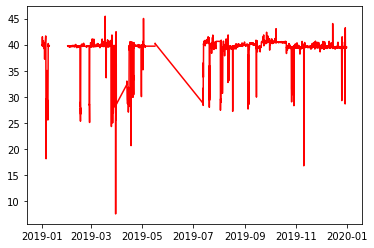

In [ ]:
# try to plot a column
plt.plot(data['Date & Time'], data['TT2211.MEAS'], 'r')

BGSC85050.CIN
BGSO85050.CIN
FT85050.MEAS
ORF_FT85050.RO01
ORF_FT85050.RO02
PT85050.MEAS
PT85051.MEAS
TT85051.MEAS
TZT85012B.MEAS
TT85011B.MEAS
PDT85041A.MEAS
PDT85041B.MEAS
TT85044A.MEAS
TT85044B.MEAS
TZT85044B.MEAS
TT85020.MEAS
TT2211.MEAS


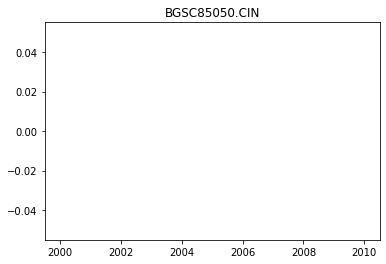

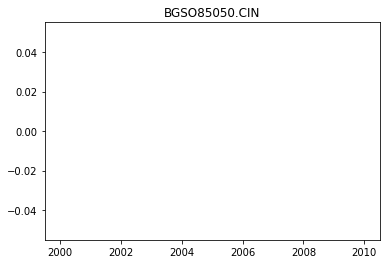

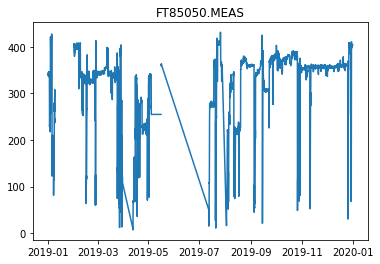

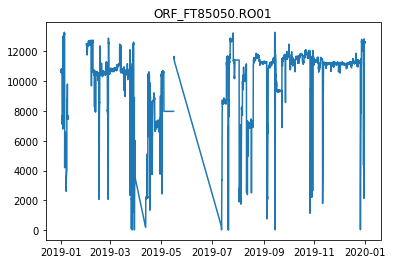

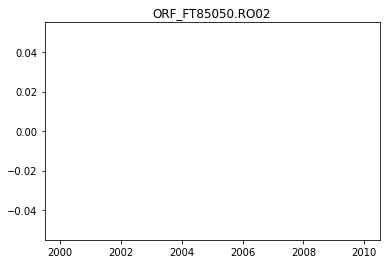

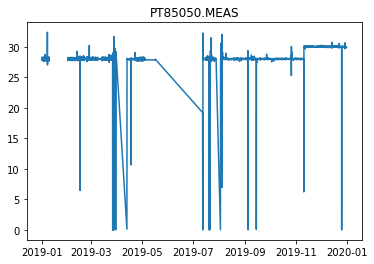

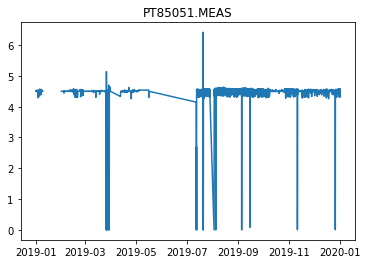

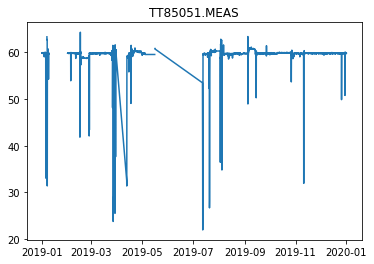

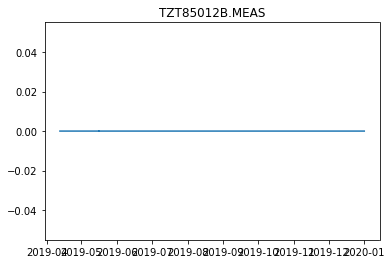

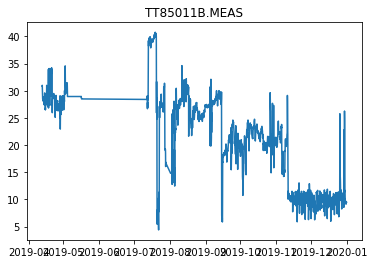

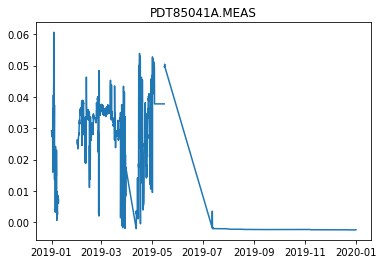

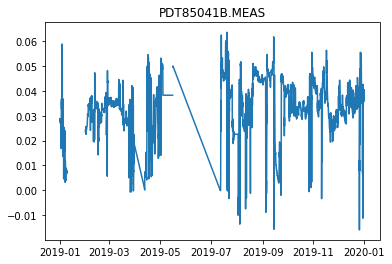

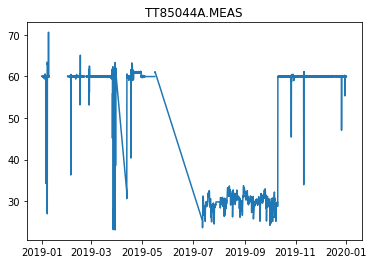

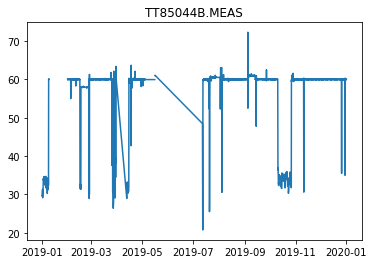

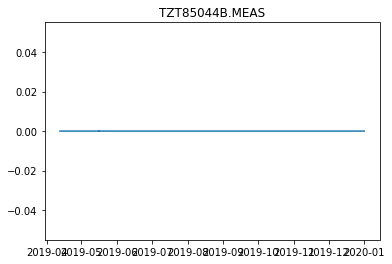

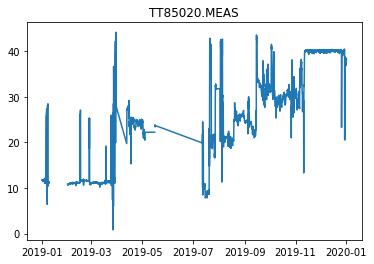

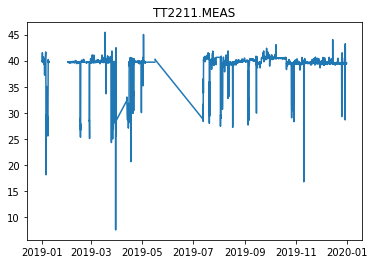

In [ ]:
# plot all columns except for the for column
for my_column in headers[1:]:
  print(my_column)
  plt.figure()
  plt.plot(data['Date & Time'], data[my_column])

  plt.title(my_column)
  plt.savefig(my_column+'.png')

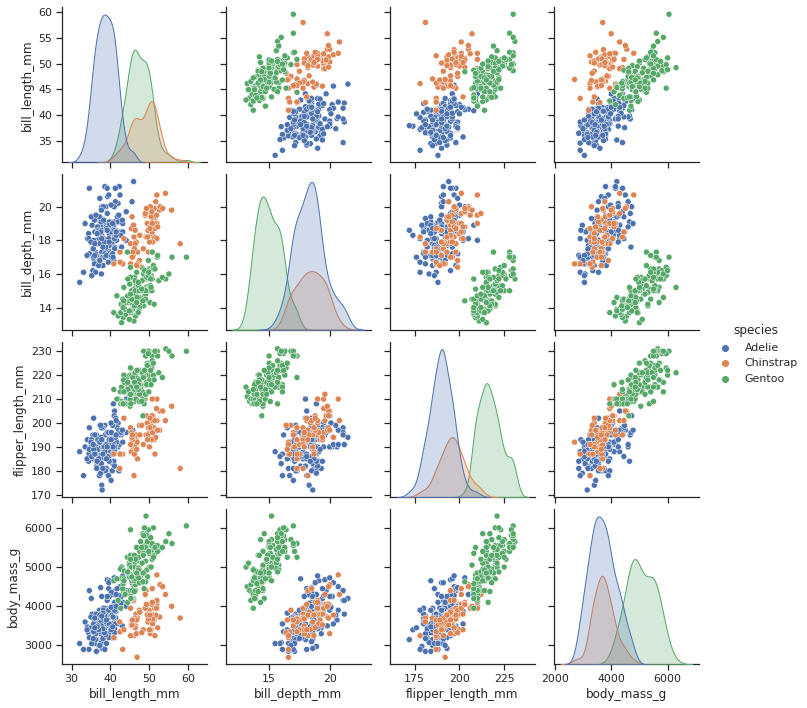

In [ ]:
# try some examples from seaborn
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

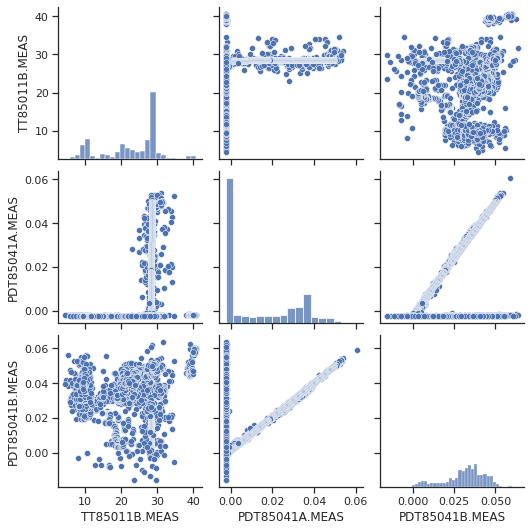

In [ ]:
# change the example to fit our data
sns.pairplot(data[ headers[10:13] ] )

In [ ]:
# try example from plotly express
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
color='species')
fig.show()

In [ ]:
# change the example to fit our data
fig = px.scatter_3d(data, x='PDT85041A.MEAS', y='PDT85041B.MEAS', z='TT85044A.MEAS',
color='TT85044B.MEAS')
fig.show()

In [ ]:
pahh = 25 # bar

low_lim = data['PT85050.MEAS'] < pahh

data['Low limit breached'] = low_lim

data

,Date & Time,BGSC85050.CIN,BGSO85050.CIN,FT85050.MEAS,ORF_FT85050.RO01,ORF_FT85050.RO02,PT85050.MEAS,PT85051.MEAS,TT85051.MEAS,TZT85012B.MEAS,TT85011B.MEAS,PDT85041A.MEAS,PDT85041B.MEAS,TT85044A.MEAS,TT85044B.MEAS,TZT85044B.MEAS,TT85020.MEAS,TT2211.MEAS,Low limit breached
0,2019-01-01 00:00:00,NaN,NaN,344.612152,10734.33789,NaN,28.067398,4.500782,59.871010,NaN,NaN,0.029219,0.028809,60.058846,29.662872,NaN,11.715836,39.903618,False
1,2019-01-01 02:00:00,NaN,NaN,339.391449,10662.99902,NaN,28.252543,4.499023,59.871719,NaN,NaN,0.028984,0.028633,60.092915,29.590961,NaN,11.686252,39.767513,False
2,2019-01-01 04:00:00,NaN,NaN,338.115967,10635.72656,NaN,28.243980,4.500391,59.828228,NaN,NaN,0.028535,0.028472,59.942257,29.561293,NaN,11.667680,39.829945,False
3,2019-01-01 06:00:00,NaN,NaN,343.298035,10719.99121,NaN,27.772057,4.500943,59.881924,NaN,NaN,0.027758,0.027434,60.105026,29.852184,NaN,11.673739,41.513962,False
4,2019-01-01 08:00:00,NaN,NaN,336.002808,10599.94824,NaN,28.262009,4.499493,59.799877,NaN,NaN,0.028574,0.028502,59.952572,30.080166,NaN,11.750163,39.793205,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,2019-12-31 14:00:00,NaN,NaN,402.804901,12600.02246,NaN,30.026367,4.565685,59.819748,0.0,9.211327,-0.002402,0.039824,60.023697,60.035416,0.0,36.940678,39.502232,False
4365,2019-12-31 16:00:00,NaN,NaN,403.660706,12618.95215,NaN,29.970884,4.549770,59.829029,0.0,9.375669,-0.002402,0.038691,60.049587,59.965893,0.0,37.728168,39.586201,False
4366,2019-12-31 18:00:00,NaN,NaN,403.584442,12598.95117,NaN,29.951536,4.573690,59.778336,0.0,9.597925,-0.002402,0.037676,59.877220,59.989513,0.0,37.202236,39.330051,False
4367,2019-12-31 20:00:00,NaN,NaN,403.277222,12597.16992,NaN,29.959421,4.583581,59.742188,0.0,9.507779,-0.002402,0.036426,59.934788,59.928696,0.0,37.748539,39.450592,False


In [ ]:
!pip install python-docx

     |████████████████████████████████| 5.6 MB 5.1 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=7b80469cf9ba595ccfc6c2cdf9a0202b64b5d69baafc47ac2de958ec1cd17cf3
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [ ]:
from docx import Document

In [ ]:
import glob

glob.glob("*.png")

doc = Document()

doc.add_heading('This is my fancy header')

for my_graph in glob.glob("*.png"):
  doc.add_picture(my_graph)

doc.save('my_doc.docx')

In [ ]:
import os

for my_graph in glob.glob("*.png"):
  os.remove(my_graph)